<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [2]:
# Exploring dataset

df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
# Removing "Other" category
# It will not be useful in the graph

df = df[df.Occupation != "Other"]

In [10]:
# Creating a cross tab that will tell us the percentage of each occupation guests held by year

occupation_by_year_crosstab = (pd.crosstab(df['Occupation'], 
            df['Year'], 
            normalize='columns') * 100)

# Examining the crosstab

occupation_by_year_crosstab

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",92.024540,78.125,75.496689,65.131579,61.589404,43.448276,42.857143,42.647059,33.644860,23.611111,26.771654,42.028986,41.353383,34.108527,49.650350,46.376812,52.325581
Government and Politics,1.226994,8.750,3.973510,7.236842,11.258278,25.517241,18.571429,22.794118,22.429907,22.916667,26.771654,21.739130,20.300752,25.581395,14.685315,15.217391,19.767442
Media,6.748466,13.125,20.529801,27.631579,27.152318,31.034483,38.571429,34.558824,43.925234,53.472222,46.456693,36.231884,38.345865,40.310078,35.664336,38.405797,27.906977


In [11]:
# Transposing the crosstab so it can be graphed

occupation_by_year_crosstab.T

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,92.024540,1.226994,6.748466
2000,78.125000,8.750000,13.125000
2001,75.496689,3.973510,20.529801
2002,65.131579,7.236842,27.631579
2003,61.589404,11.258278,27.152318
2004,43.448276,25.517241,31.034483
2005,42.857143,18.571429,38.571429
2006,42.647059,22.794118,34.558824
2007,33.644860,22.429907,43.925234


# Part 2 — Recreate this explanatory visualization:

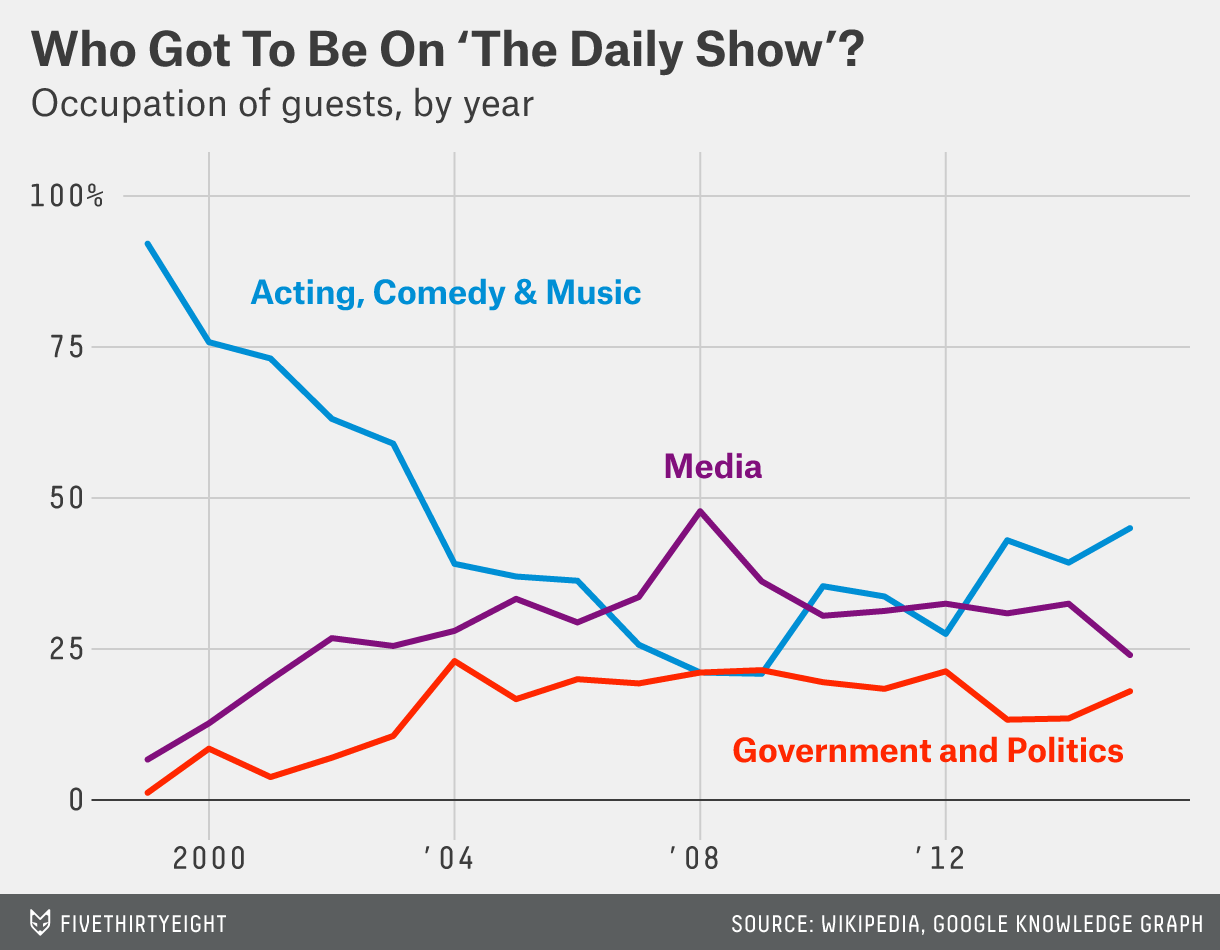

In [12]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [13]:
# Displaying the crosstab for reference while graphing

occupation_by_year_crosstab.head()

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",92.024540,78.125,75.496689,65.131579,61.589404,43.448276,42.857143,42.647059,33.644860,23.611111,26.771654,42.028986,41.353383,34.108527,49.650350,46.376812,52.325581
Government and Politics,1.226994,8.750,3.973510,7.236842,11.258278,25.517241,18.571429,22.794118,22.429907,22.916667,26.771654,21.739130,20.300752,25.581395,14.685315,15.217391,19.767442
Media,6.748466,13.125,20.529801,27.631579,27.152318,31.034483,38.571429,34.558824,43.925234,53.472222,46.456693,36.231884,38.345865,40.310078,35.664336,38.405797,27.906977


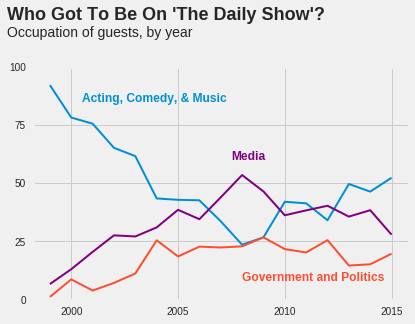

In [97]:
# Setting the style to 'fivethirtyeight' so it looks similar to their graph 
plt.style.use('fivethirtyeight');

# Defining the graph
ax = occupation_by_year_crosstab.T.pivot_table(index='Year').plot(linewidth=2);

# Setting header and sub-header
ax.text(x=1997, y=120, s="Who Got To Be On 'The Daily Show'?", fontsize=18, fontweight='bold')
ax.text(x=1997, y=113, s="Occupation of guests, by year", fontsize=14, fontweight='light')

# Setting labels for our four lines
ax.text(x=2000.5, y=85, s="Acting, Comedy, & Music", fontsize=12, fontweight='bold', color=ax.get_lines()[0].get_c())
ax.text(x=2008, y=8, s="Government and Politics", fontsize=12, fontweight='bold', color=ax.get_lines()[1].get_c())
# Changing the color for the Media line to purple
ax.get_lines()[2].set_color("purple")
ax.text(x=2007.5, y=60, s="Media", fontsize=12, fontweight='bold', color=ax.get_lines()[2].get_c())

# Removing the legend, which was obscuring the line labels
ax.get_legend().remove()

# The last y tick should be 100, as we are dealing with percentages on that axis
ax.set_ylim(0,100);

# The xaxis Label "year" is redundant
ax.xaxis.label.set_visible(False)

# We only need four ticks along each axis, as is in the eample. Binning them into four groups
ax.locator_params(nbins=4, axis='x')

ax.locator_params(nbins=4, axis='y')


# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
# Sorting df by 'Guest' and defining a new dataframe 'top_guests'
top_guests = df['Guest'].value_counts()

In [0]:

# Selecting the first ten values for a new dataframe 'top_ten_guests'
top_ten_guests = top_guests.head(10)

# Displaying the new dataframe
top_ten_guests

In [99]:
# Since there are only ten entries, manually assign all items to a dictionary where the name is the guest and the value is the number of appearances
top_ten_guests_dict = {"Fareed Zakaria" : 19, "Denis Leary" : 17, "Brian Williams" : 16,
                           "Ricky Gervais" : 13, "Paul Rudd" : 13, "Tom Brokaw" : 12, "Will Ferrell" : 10, 
                           "Richard Lewis" : 10, "Reza Aslan" : 10, "Bill O'Reilly": 10}


# Converting our dictionary to a pandas dataframe
top_ten_guests = pd.DataFrame(list(top_ten_guests_dict.items()), columns=['Guest', 'Appearances'])

# Confirming that the conversion was performed correctly
top_ten_guests.head(10)

,Guest,Appearances
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13
5,Tom Brokaw,12
6,Will Ferrell,10
7,Richard Lewis,10
8,Reza Aslan,10
9,Bill O'Reilly,10


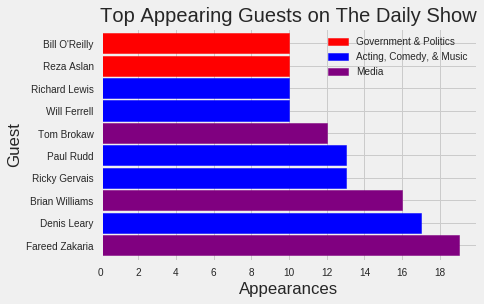

In [150]:
# Plotting top appearing guests with a barh graph
import matplotlib.patches as mpatches

ax = top_ten_guests.plot.barh('Guest', width=0.9, title="Top Appearing Guests on The Daily Show", color = 'green');

# Setting color according to occupation
ax.get_children()[0].set_color('purple')
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('purple')
ax.get_children()[3].set_color('b')
ax.get_children()[4].set_color('b')
ax.get_children()[5].set_color('purple')
ax.get_children()[6].set_color('b')
ax.get_children()[7].set_color('b')
ax.get_children()[8].set_color('red')
ax.get_children()[9].set_color('red')


# Binning the x-ticks so I don't get any more "half-appearances" 
ax.locator_params(nbins=12, axis='x')

# Changing the legend to account for the new color coding


red_patch = mpatches.Patch(color='red', label='Government & Politics')
blue_patch = mpatches.Patch(color='blue', label='Acting, Comedy, & Music')
purple_patch = mpatches.Patch(color='purple', label='Media')


# Setting x label for reference

plt.legend(handles=[red_patch, blue_patch, purple_patch])
ax.set_xlabel("Appearances");